In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [105]:
df = pd.read_excel("cars_7.xlsx")
df.head()

,Brand,Type,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,13495
1,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,16500
2,alfa-romero,hatchback,94.5,171.2,65.5,52.4,2823,6,152,9.0,154,19,26,16500
3,audi,sedan,99.4,176.6,66.4,54.3,2824,5,136,8.0,115,18,22,17450
4,audi,sedan,99.8,177.3,66.3,53.1,2507,5,136,8.5,110,19,25,15250


In [107]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the "Type" column
df["Type"] = label_encoder.fit_transform(df["Type"])

# Print the encoded DataFrame
print(df.head())


         Brand  Type  Wheel-base  Length  Width  Height  Curb-weight  \
0  alfa-romero     0        88.6   168.8   64.1    48.8         2548   
1  alfa-romero     0        88.6   168.8   64.1    48.8         2548   
2  alfa-romero     2        94.5   171.2   65.5    52.4         2823   
3         audi     3        99.4   176.6   66.4    54.3         2824   
4         audi     3        99.8   177.3   66.3    53.1         2507   

   Cylinders  Engine  Compression-ratio  Horsepower  City-mpg  Highway-mpg  \
0          4     130                9.0         111        21           27   
1          4     130                9.0         111        21           27   
2          6     152                9.0         154        19           26   
3          5     136                8.0         115        18           22   
4          5     136                8.5         110        19           25   

   Price  
0  13495  
1  16500  
2  16500  
3  17450  
4  15250  


In [108]:
df_reduced, df_label = df.drop(['Brand'], axis=1), df['Brand']

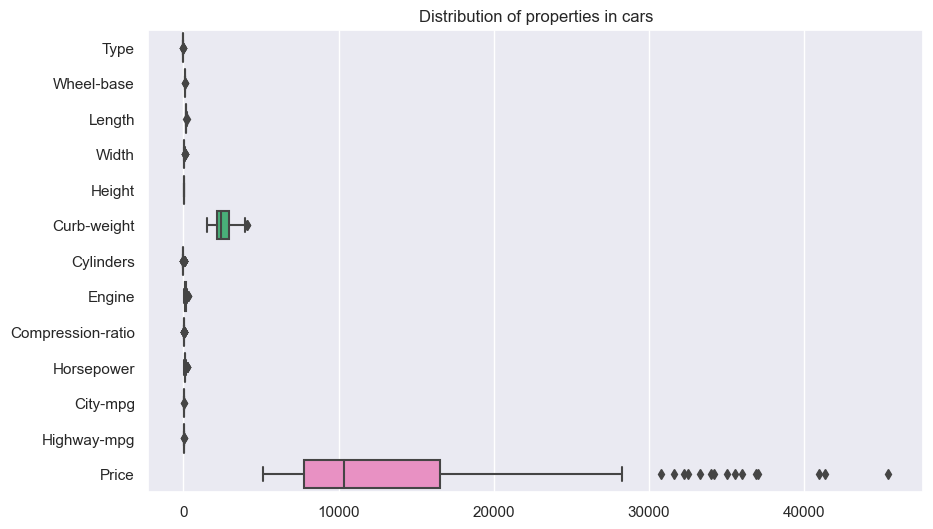

In [109]:
plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_reduced, orient="h")
plt.title("Distribution of properties in cars")
plt.show()

In [110]:
scale = StandardScaler()
df_scale = pd.DataFrame(scale.fit_transform(df_reduced),
                        columns=df_reduced.columns)


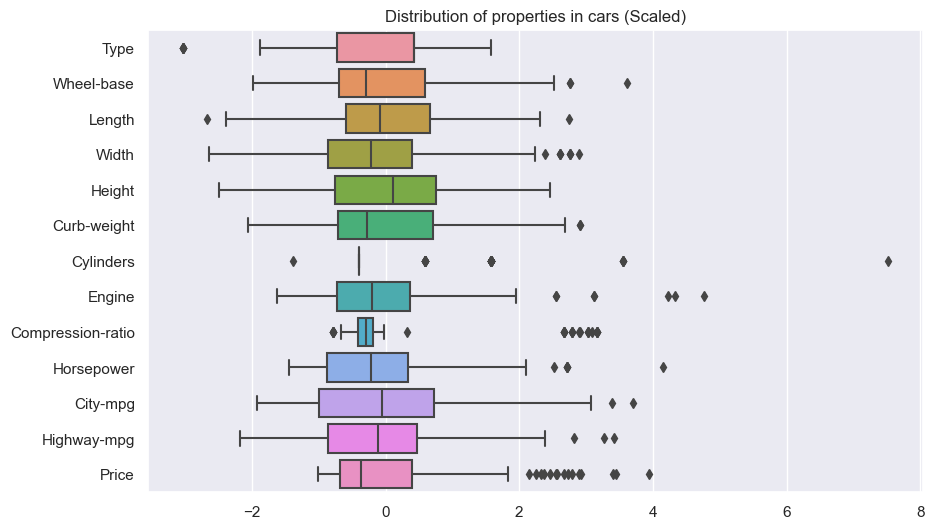

In [111]:
plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_scale, orient="h")
plt.title("Distribution of properties in cars (Scaled)")
plt.show()

In [112]:
def pca_results(data, pca):

    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1, len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(
        np.round(pca.components_, 4), columns=data.keys())
    components.index = dimensions

    # PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns=['Eigenvalue'])
    eigenvalues.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(
        np.round(ratios, 4), columns=['Explained Variance'])
    variance_ratios.index = dimensions

    # PCA cumulative variance explained
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns=[
                                       'Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis=1)

In [113]:
pca = PCA(n_components=len(df_scale.columns)).fit(df_scale)

pca_sampled = pca.transform(df_scale)

In [114]:
pca_results(df_scale, pca)

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Type,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
PC 1,7.4468,0.5699,0.5699,0.0382,0.2745,0.3205,0.3213,0.0988,0.3513,0.2648,0.3311,-0.0039,0.3072,-0.3144,-0.3227,0.3273
PC 2,2.4828,0.1900,0.7599,-0.4652,-0.3574,-0.2445,-0.1433,-0.5099,-0.0684,0.2222,0.1505,-0.3403,0.2722,-0.1547,-0.1134,0.1096
PC 3,1.1966,0.0916,0.8515,-0.3180,-0.0119,-0.0514,0.1191,-0.1729,0.0757,0.2307,0.2118,0.7109,-0.0346,0.3257,0.3055,0.2056
PC 4,0.6013,0.0460,0.8975,0.6612,-0.1333,-0.1298,-0.1818,-0.0408,-0.0894,0.6097,0.1833,-0.1050,0.0692,0.1803,0.1723,0.0466
PC 5,0.3847,0.0294,0.9269,-0.3528,-0.1041,-0.1454,-0.2632,0.7900,-0.1069,0.1805,0.0721,-0.1351,0.0418,0.0628,0.0647,0.2700
PC 6,0.3278,0.0251,0.9520,-0.2264,0.4355,0.0709,0.3593,-0.0874,-0.1052,0.1790,0.1336,-0.5257,-0.3211,0.3251,0.2648,-0.0332
PC 7,0.1718,0.0131,0.9652,0.1712,0.0080,0.0881,-0.0314,-0.0901,0.0027,-0.4881,0.0117,-0.1858,0.4482,0.2432,0.3888,0.5194
PC 8,0.1340,0.0103,0.9754,0.0743,-0.3356,-0.2031,0.7362,0.1208,-0.2829,0.1096,-0.3914,0.0241,0.1005,-0.0582,-0.0176,0.1561
PC 9,0.1055,0.0081,0.9835,-0.1084,-0.2465,0.2818,0.1627,0.1780,0.1442,0.0298,0.1384,-0.0532,0.4895,0.1652,0.2467,-0.6469
PC 10,0.0840,0.0064,0.9899,0.0687,0.3322,-0.7902,0.1224,0.0748,0.2133,-0.1570,0.1719,0.0229,0.2531,0.1347,-0.1499,-0.1870


<Figure size 640x480 with 0 Axes>

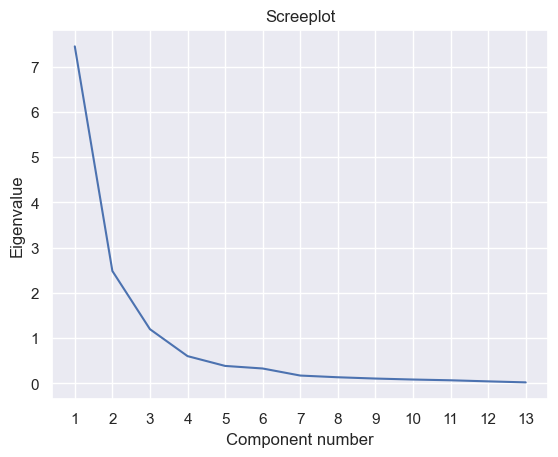

In [115]:
# Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel='Component number', ylabel='Eigenvalue', title='Screeplot')
plt.show()

In [116]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [117]:
def plot_loading_plot(data, pca, width=5, height=5, margin=0.25, ax=None):
    # Set limits for figure
    x_min = min(pca.components_[0, :].min(), 0)-margin
    x_max = max(pca.components_[0, :].max(), 0)+margin
    y_min = min(pca.components_[1, :].min(), 0)-margin
    y_max = max(pca.components_[1, :].max(), 0)+margin
    if ax is None:
        fig, ax = plt.subplots(figsize=(width, height))
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
    # Give each component own color for legend
    cmap = get_cmap(len(pca.components_.T) + 1)
    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1,
                 head_length=0.1, linewidth=2, color=cmap(i), label=data.columns[i])
   
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("Loading plot")
    plt.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        fancybox=True,
        shadow=True,
        ncol=2)
    return ax

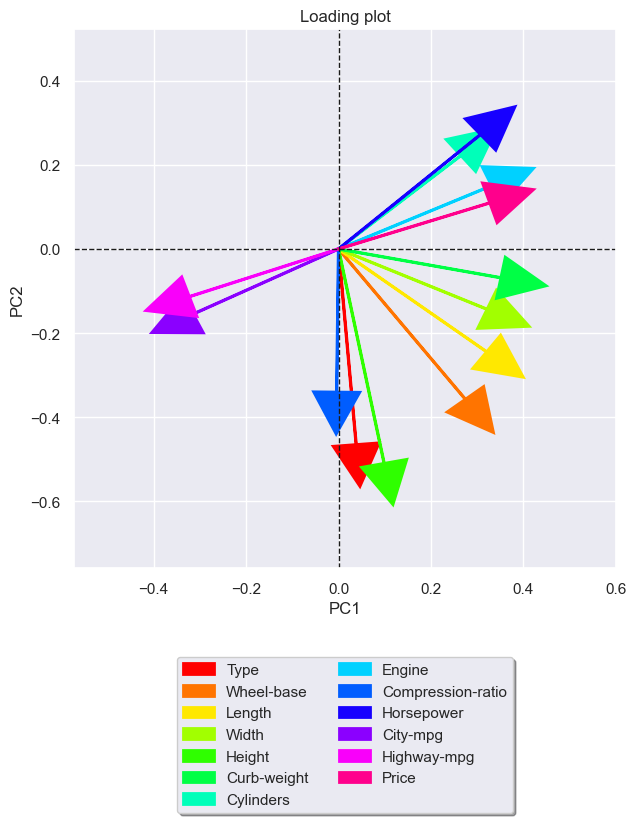

In [118]:
plt.clf
plot_loading_plot(df_reduced, pca, width=7, height=7)
plt.show()

In [119]:
def pca_extractor(data, pca, n_components):
    return pd.DataFrame(pca.transform(data)).iloc[:, :n_components]


def plot_score_plot(data=None, pca=None, n_components=None, categorise=None, ax=None, width=5, height=5, margin=0.5):
    if ax is None:
        fig, ax = plt.subplots(figsize=(width, height))
    score = pca_extractor(data, pca, n_components)
    x_min = min(score[0].min(), 0)-margin
    x_max = max(score[0].max(), 0)+margin
    y_min = min(score[1].min(), 0)-margin
    y_max = max(score[1].max(), 0)+margin
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("Score plot")
    if categorise is not None and isinstance(categorise, pd.Series):
        df = pd.concat([score, categorise], axis=1)
        sns.scatterplot(data=df, x=0, y=1, hue=categorise.name)
        plt.legend(
            loc='upper center',
            bbox_to_anchor=(0.5, -0.15),
            fancybox=True,
            shadow=True,
            ncol=2)
    else:
        sns.scatterplot(data=score, x=0, y=1)

    return ax

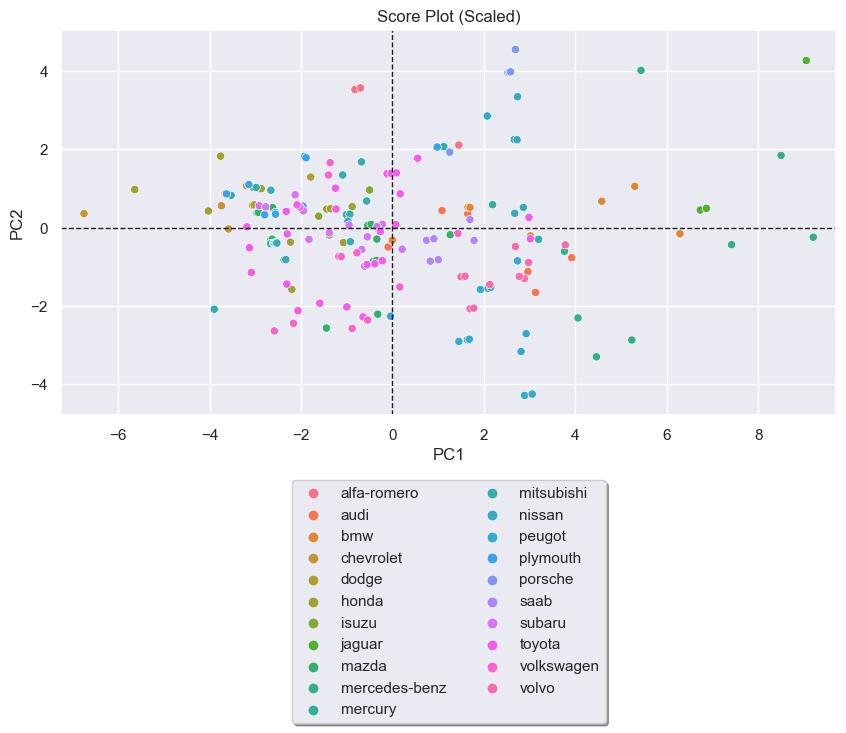

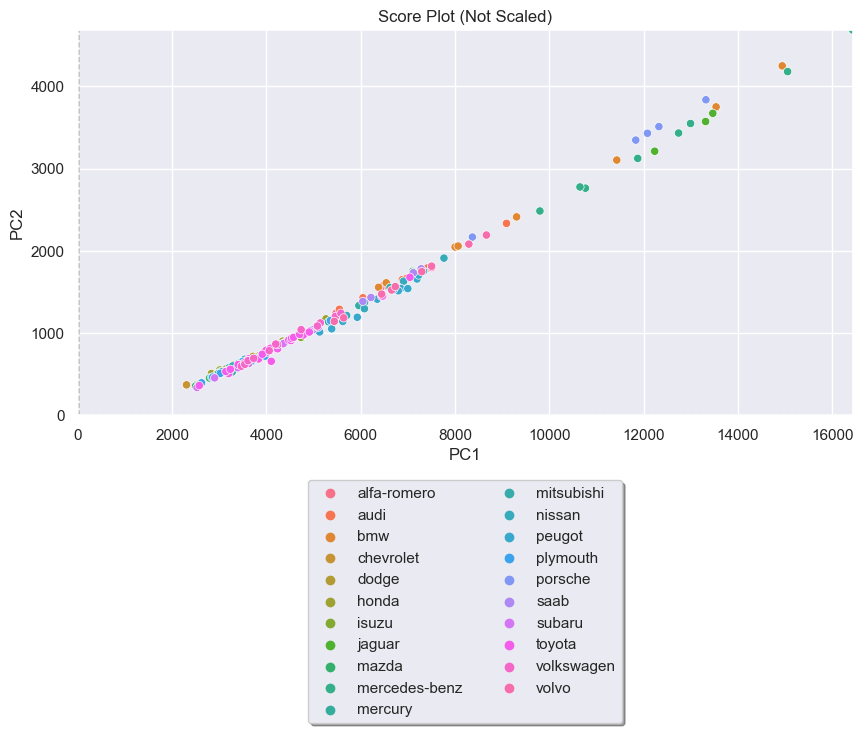

In [120]:
scaled = plot_score_plot(df_scale, pca, 2, categorise=df_label, width=10)
unscaled = plot_score_plot(df_reduced, pca, 2, categorise=df_label, width=10)
scaled.set_title("Score Plot (Scaled)")
unscaled.set_title("Score Plot (Not Scaled)")
plt.show()